Version of MaodelPlots.ipynb using more astropy code. Cleaning out my code for a simpler, shorter notebook.

In [1]:
%pylab inline
import scipy.integrate
from astropy import cosmology, units as u, constants as const
from classy import Class

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_comp(x, y, title1, title2, comp1=None, comp2=None, comp3=None, comp4=None,
              comp5 = None, comp6 = None, xlabel = '$z$'):
    """
    Plots y and comparisons of the form Delta y / y. 
    
    Arguments:
        x (np.array): independent axis
        y (np.array): dependent axis to be compared against
        title1 (str): y-axis label for original plot
        title2 (str): y-axis label for comparison plot
        comp1-4 (tuple of (np.array, str)): Comparison y axis data and legend entry
        xlabel (str): x-axis label for both plots
    """
    plt.figure(figsize = (6,6.5))
    gs = matplotlib.gridspec.GridSpec(2,1,height_ratios=[8,3])
    gs.update(hspace=0.05)
    
    ax1 = plt.subplot(gs[0])
    ax1.plot(x, y, 'k-', linewidth = 1.5)
    ax1.set_ylabel(title1)
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    ax2 = plt.subplot(gs[1], sharex = ax1)
    ax2.plot(x, np.zeros(len(x)), 'k-', linewidth = 1.5, label = '$flat$ $\Lambda CDM$')
    if comp1:
        ax2.plot(x, (comp1[0]-y)/y, 'r:',  linewidth = 1.5, label = comp1[1])
    if comp2:
        ax2.plot(x, (comp2[0]-y)/y, 'b--',  linewidth = 1.5, label = comp2[1])
    if comp3:
        ax2.plot(x, (comp3[0]-y)/y, 'y--',  linewidth = 1.5, dashes = (15,5), label = comp3[1])
    if comp4:
        ax2.plot(x, (comp4[0]-y)/y, 'g-.',  linewidth = 1.5, label = comp4[1])
    if comp5:
        ax2.plot(x, (comp5[0]-y)/y, 'c:',  linewidth = 1.5, label = comp5[1])
    if comp6:
        ax2.plot(x, (comp6[0]-y)/y, 'm--',  linewidth = 1.5, label = comp6[1])
    ax2.set_ylabel(title2)
    ax2.set_xlabel(xlabel)
    
    handles, labels = ax2.get_legend_handles_labels()
    ax1.legend(handles, labels, loc = 0, frameon = False, handlelength = 3.5)
    
    plt.show()

In [26]:
Z = np.linspace(0,3,num=901)
cosmo1 = cosmology.w0waCDM(71.0, 0.222 + 0.045, 0.733, Ob0 = 0.045, Tcmb0 = 0)
cosmopos = cosmology.w0waCDM(77.6, 0.186 + 0.038, 0.766, Ob0 = 0.038, Tcmb0 = 0)
cosmoneg = cosmology.w0waCDM(66.1, 0.256 + 0.052, 0.702, Ob0 = 0.052, Tcmb0 = 0)
cosmo9 = cosmology.w0waCDM(67.5, 0.246 + 0.050, 0.704, w0 = -0.9, Ob0 = 0.050, Tcmb0 = 0)
cosmo11 = cosmology.w0waCDM(74.6, 0.201 + 0.041, 0.758, w0 = -1.1, Ob0 = 0.041, Tcmb0 = 0)
cosmo5 = cosmology.w0waCDM(71.0, 0.222 + 0.045, 0.733, wa = 0.5, Ob0 = 0.045, Tcmb0 = 0)
cosmo15 = cosmology.w0waCDM(71.0, 0.222 + 0.045, 0.733, wa = -0.5, Ob0 = 0.045, Tcmb0 = 0)

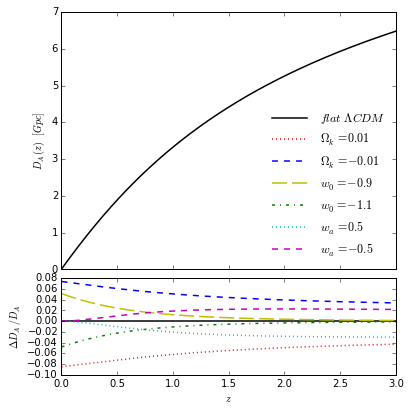

In [27]:
plot_comp(Z[1:], cosmo1.comoving_distance(Z[1:]).to('Gpc'), '$D_A (z)$  $[Gpc]$', '$\Delta D_A/D_A$',
          comp1=(cosmopos.comoving_distance(Z[1:]).to('Gpc'), '$\Omega_k=0.01$'),
          comp2=(cosmoneg.comoving_distance(Z[1:]).to('Gpc'), '$\Omega_k=-0.01$'),
          comp3=(cosmo9.comoving_distance(Z[1:]).to('Gpc'), '$w_0=-0.9$'),
          comp4=(cosmo11.comoving_distance(Z[1:]).to('Gpc'), '$w_0=-1.1$'),
          comp5=(cosmo5.comoving_distance(Z[1:]).to('Gpc'), '$w_a=0.5$'),
          comp6=(cosmo15.comoving_distance(Z[1:]).to('Gpc'), '$w_a=-0.5$'))

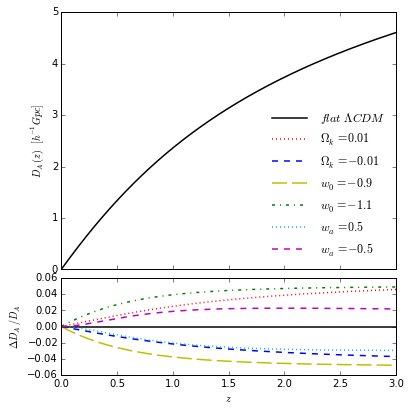

In [28]:
plot_comp(Z[1:], cosmo1.comoving_distance(Z[1:]).to('Gpc') * cosmo1.h, '$D_A (z)$  $[h^{-1} Gpc]$', '$\Delta D_A/D_A$',
          comp1=(cosmopos.comoving_distance(Z[1:]).to('Gpc') * cosmopos.h, '$\Omega_k=0.01$'),
          comp2=(cosmoneg.comoving_distance(Z[1:]).to('Gpc') * cosmoneg.h, '$\Omega_k=-0.01$'),
          comp3=(cosmo9.comoving_distance(Z[1:]).to('Gpc') * cosmo9.h, '$w_0=-0.9$'),
          comp4=(cosmo11.comoving_distance(Z[1:]).to('Gpc') * cosmo11.h, '$w_0=-1.1$'),
          comp5=(cosmo5.comoving_distance(Z[1:]).to('Gpc') * cosmo5.h, '$w_a=0.5$'),
          comp6=(cosmo15.comoving_distance(Z[1:]).to('Gpc') * cosmo15.h, '$w_a=-0.5$'))

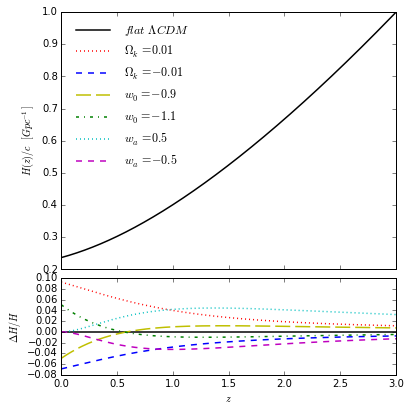

In [29]:
plot_comp(Z, (cosmo1.H(Z) / const.c).to(1 / u.Gpc), '$H (z) / c$  $[Gpc^{-1}]$', '$\Delta H/H$',
          comp1=((cosmopos.H(Z) / const.c).to(1 / u.Gpc), '$\Omega_k=0.01$'),
          comp2=((cosmoneg.H(Z) / const.c).to(1 / u.Gpc), '$\Omega_k=-0.01$'),
          comp3=((cosmo9.H(Z) / const.c).to(1 / u.Gpc), '$w_0=-0.9$'),
          comp4=((cosmo11.H(Z) / const.c).to(1 / u.Gpc), '$w_0=-1.1$'),
          comp5=((cosmo5.H(Z) / const.c).to(1 / u.Gpc), '$w_a=0.5$'),
          comp6=((cosmo15.H(Z) / const.c).to(1 / u.Gpc), '$w_a=-0.5$'))

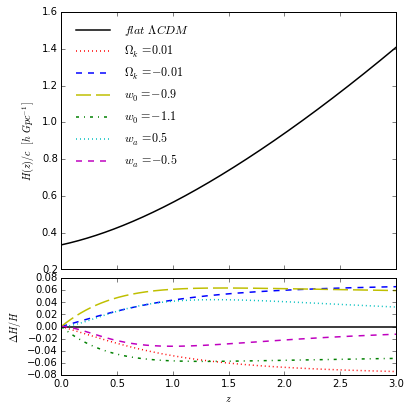

In [30]:
plot_comp(Z, (cosmo1.H(Z) / const.c).to(1 / u.Gpc) / cosmo1.h, '$H (z) / c$  $[h \, Gpc^{-1}]$', '$\Delta H/H$',
          comp1=((cosmopos.H(Z) / const.c).to(1 / u.Gpc) / cosmopos.h, '$\Omega_k=0.01$'),
          comp2=((cosmoneg.H(Z) / const.c).to(1 / u.Gpc) / cosmoneg.h, '$\Omega_k=-0.01$'),
          comp3=((cosmo9.H(Z) / const.c).to(1 / u.Gpc) / cosmo9.h, '$w_0=-0.9$'),
          comp4=((cosmo11.H(Z) / const.c).to(1 / u.Gpc) / cosmo11.h, '$w_0=-1.1$'),
          comp5=((cosmo5.H(Z) / const.c).to(1 / u.Gpc) / cosmo5.h, '$w_a=0.5$'),
          comp6=((cosmo15.H(Z) / const.c).to(1 / u.Gpc) / cosmo15.h, '$w_a=-0.5$'))

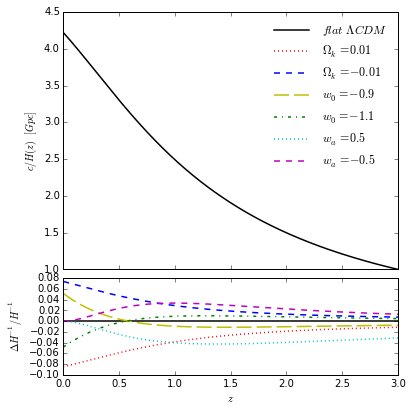

In [31]:
plot_comp(Z, (const.c / cosmo1.H(Z)).to(u.Gpc), '$c / H (z)$  $[Gpc]$', '$\Delta H^{-1}/H^{-1}$',
          comp1=((const.c / cosmopos.H(Z)).to(u.Gpc), '$\Omega_k=0.01$'),
          comp2=((const.c / cosmoneg.H(Z)).to(u.Gpc), '$\Omega_k=-0.01$'),
          comp3=((const.c / cosmo9.H(Z)).to(u.Gpc), '$w_0=-0.9$'),
          comp4=((const.c / cosmo11.H(Z)).to(u.Gpc), '$w_0=-1.1$'),
          comp5=((const.c / cosmo5.H(Z)).to(u.Gpc), '$w_a=0.5$'),
          comp6=((const.c / cosmo15.H(Z)).to(u.Gpc), '$w_a=-0.5$'))

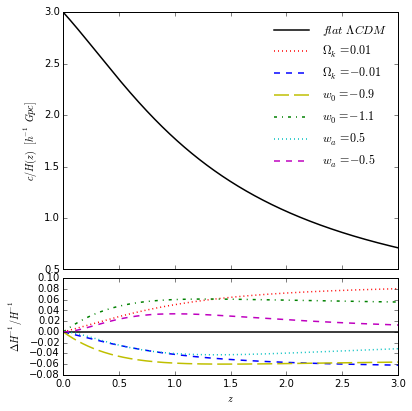

In [32]:
plot_comp(Z, (const.c / cosmo1.H(Z)).to(u.Gpc) * cosmo1.h, '$c / H (z)$  $[h^{-1} \, Gpc]$', '$\Delta H^{-1}/H^{-1}$',
          comp1=((const.c / cosmopos.H(Z)).to(u.Gpc) * cosmopos.h, '$\Omega_k=0.01$'),
          comp2=((const.c / cosmoneg.H(Z)).to(u.Gpc) * cosmoneg.h, '$\Omega_k=-0.01$'),
          comp3=((const.c / cosmo9.H(Z)).to(u.Gpc) * cosmo9.h, '$w_0=-0.9$'),
          comp4=((const.c / cosmo11.H(Z)).to(u.Gpc) * cosmo11.h, '$w_0=-1.1$'),
          comp5=((const.c / cosmo5.H(Z)).to(u.Gpc) * cosmo5.h, '$w_a=0.5$'),
          comp6=((const.c / cosmo15.H(Z)).to(u.Gpc) * cosmo15.h, '$w_a=-0.5$'))

In [55]:
def Growth(z, g, arg1):
    """
    Returns derivatives for Growth function. (Used for scipy ode)
    
    Arguments:
        z (np.array): redshift value(s) to find derivatives at
        g ([float]): list of current values of G and G'
        arg1 (astropy.cosmology.w0waCDM): w0waCDM class for which to calculate growth function
    
    Returns
        dgdz ([float]): list of G' and G''
    """
    G, Gprime = g
    Om, Op, w0, wa, Or, Ok = (arg1.Om0, arg1.Ode0, arg1.w0, arg1.wa, arg1.Ogamma0, arg1.Ok0)
    gppcoeff = ((1 + z) * arg1.H(z)) ** 2
    H0 = arg1.H0
    Opp = (3 * (1 + w0 + z + w0 * z + wa * z) * Op
           * (1 + z) ** (3 * w0 + 3 * wa + 1)
           * np.exp(-3 * wa * z / (1 + z)))
    E2p = (3 * Om * (1 + z) ** 2 + 4 * Or * (1 + z) ** 3
           + 2 * Ok * (1 + z) + Opp)
    gpcoeff = ((1 + z) * arg1.H(z) ** 2
               - (1 + z) ** 2 * E2p * H0 ** 2 / 2)
    gcoeff = 3 * Om * H0 ** 2 * (1 + z) ** 3 / 2
    dgdz = [Gprime, (gpcoeff / gppcoeff).to(1) * Gprime + (gcoeff / gppcoeff).to(1) * G]
    return dgdz

In [45]:
g0 = [1.0, -0.1]
t = np.linspace(0, 9, 2701)
ode = scipy.integrate.ode(Growth)
ode.set_integrator("dopri5")

In [46]:
ode.set_initial_value(g0, 9.0)
ode.set_f_params(cosmo1)
res = np.array(g0)
for time in t[::-1][1:]:
    res = np.vstack((res,ode.integrate(time)))
grow1 = res[::-1,:]

In [48]:
ode.set_initial_value(g0, 9.0)
ode.set_f_params(cosmopos)
res = np.array(g0)
for time in t[::-1][1:]:
    res = np.vstack((res,ode.integrate(time)))
growpos = res[::-1,:]

In [49]:
ode.set_initial_value(g0, 9.0)
ode.set_f_params(cosmoneg)
res = np.array(g0)
for time in t[::-1][1:]:
    res = np.vstack((res,ode.integrate(time)))
growneg = res[::-1,:]

In [50]:
ode.set_initial_value(g0, 9.0)
ode.set_f_params(cosmo9)
res = np.array(g0)
for time in t[::-1][1:]:
    res = np.vstack((res,ode.integrate(time)))
grow9 = res[::-1,:]

In [51]:
ode.set_initial_value(g0, 9.0)
ode.set_f_params(cosmo11)
res = np.array(g0)
for time in t[::-1][1:]:
    res = np.vstack((res,ode.integrate(time)))
grow11 = res[::-1,:]

In [52]:
ode.set_initial_value(g0, 9.0)
ode.set_f_params(cosmo5)
res = np.array(g0)
for time in t[::-1][1:]:
    res = np.vstack((res,ode.integrate(time)))
grow5 = res[::-1,:]

In [53]:
ode.set_initial_value(g0, 9.0)
ode.set_f_params(cosmo15)
res = np.array(g0)
for time in t[::-1][1:]:
    res = np.vstack((res,ode.integrate(time)))
grow15 = res[::-1,:]

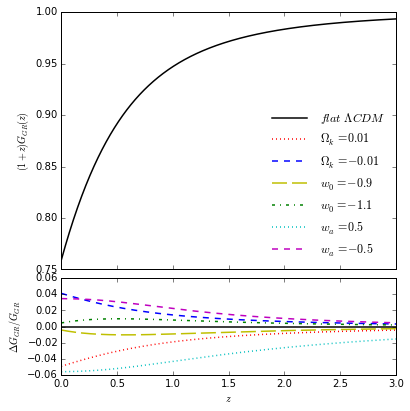

In [54]:
plot_comp(Z, (1 + Z) * grow1[:901,0] / 10,
          '$(1+z)G_{GR}(z)$', '$\Delta G_{GR}/G_{GR}$',
          comp1=((1 + Z) * growpos[:901,0] / 10, '$\Omega_k=0.01$'),
          comp2=((1 + Z) * growneg[:901,0] / 10, '$\Omega_k=-0.01$'),
          comp3=((1 + Z) * grow9[:901,0] / 10, '$w_0=-0.9$'),
          comp4=((1 + Z) * grow11[:901,0] / 10, '$w_0=-1.1$'),
          comp5=((1 + Z) * grow5[:901,0] / 10, '$w_a=0.5$'),
          comp6=((1 + Z) * grow15[:901,0] / 10, '$w_a=-0.5$'))

In [56]:
def loggrow(z, arg1):
    """
    Returns approximate value of logrithmic derivative of Growth function
    
    Arguments:
        z (np.array): redshift values to evaluate at
        arg1 (astropy.cosmology.w0waCDM): w0waCDM object containing information on universe to analyze
    
    Returns
        f (np.array): approximate values of the growth function logrithmic derivative
    """
    Om, w0, wa = (arg1.Om0, arg1.w0, arg1.wa)
    H0 = arg1.H0
    w = w0 + wa / 2
    gamma = 0.55 + 0.05 * (1 + w)
    Omz = (Om * (1 + z) ** 3 * H0 ** 2
                 / (arg1.H(z) ** 2)).to(1)
    f = Omz ** gamma
    return f

def Growth2(z, arg1):
    """
    Returns approximate value of Growth function (z <= 9)
    
    Arguments:
        z (np.array): descending redshift values to evaluate at (first entry must be 9.0)
        arg1 (astropy.cosmology.w0waCDM): w0waCDM object containing information on universe to analyze
    
    Returns
        grow (np.array): approximate values of the growth function
    """
    integrand = -1 * loggrow(z, arg1) / (1 + z)
    exponent = scipy.integrate.cumtrapz(integrand, z, initial = 0)
    grow = np.exp(exponent)
    return grow

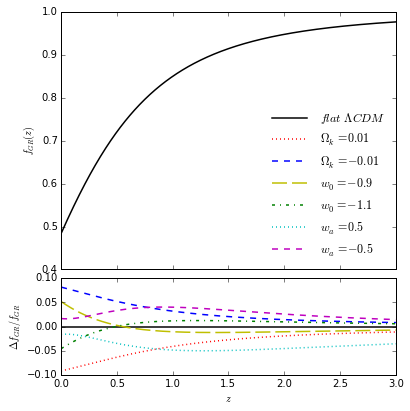

In [58]:
plot_comp(Z, loggrow(Z, cosmo1), '$f_{GR}(z)$', '$\Delta f_{GR}/f_{GR}$',
          comp1=(loggrow(Z, cosmopos), '$\Omega_k=0.01$'),
          comp2=(loggrow(Z, cosmoneg), '$\Omega_k=-0.01$'),
          comp3=(loggrow(Z, cosmo9), '$w_0=-0.9$'),
          comp4=(loggrow(Z, cosmo11), '$w_0=-1.1$'),
          comp5=(loggrow(Z, cosmo5), '$w_a=0.5$'),
          comp6=(loggrow(Z, cosmo15), '$w_a=-0.5$'))

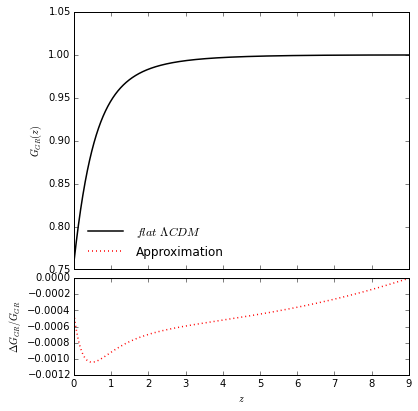

In [59]:
growapp = Growth2(t[::-1],cosmo1)
plot_comp(t, (1+t) * grow1[:,0] / 10, '$G_{GR}(z)$', '$\Delta G_{GR}/G_{GR}$',
          comp1=((1+t) * Growth2(t[::-1],cosmo1)[::-1] / 10, 'Approximation'))